In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_side_by_side(first, second, input_name, output_name, img_type):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 25))
    if img_type == 0:
        # grey
        ax1.imshow(cv2.cvtColor(first, cv2.COLOR_GRAY2RGB))
        ax2.imshow(cv2.cvtColor(second, cv2.COLOR_GRAY2RGB))
    else:
        ax1.imshow(cv2.cvtColor(first, cv2.COLOR_BGR2RGB))
        ax2.imshow(cv2.cvtColor(second, cv2.COLOR_BGR2RGB))
    ax1.set_title(input_name)
    ax2.set_title(output_name)
    plt.show()

Shape is detected


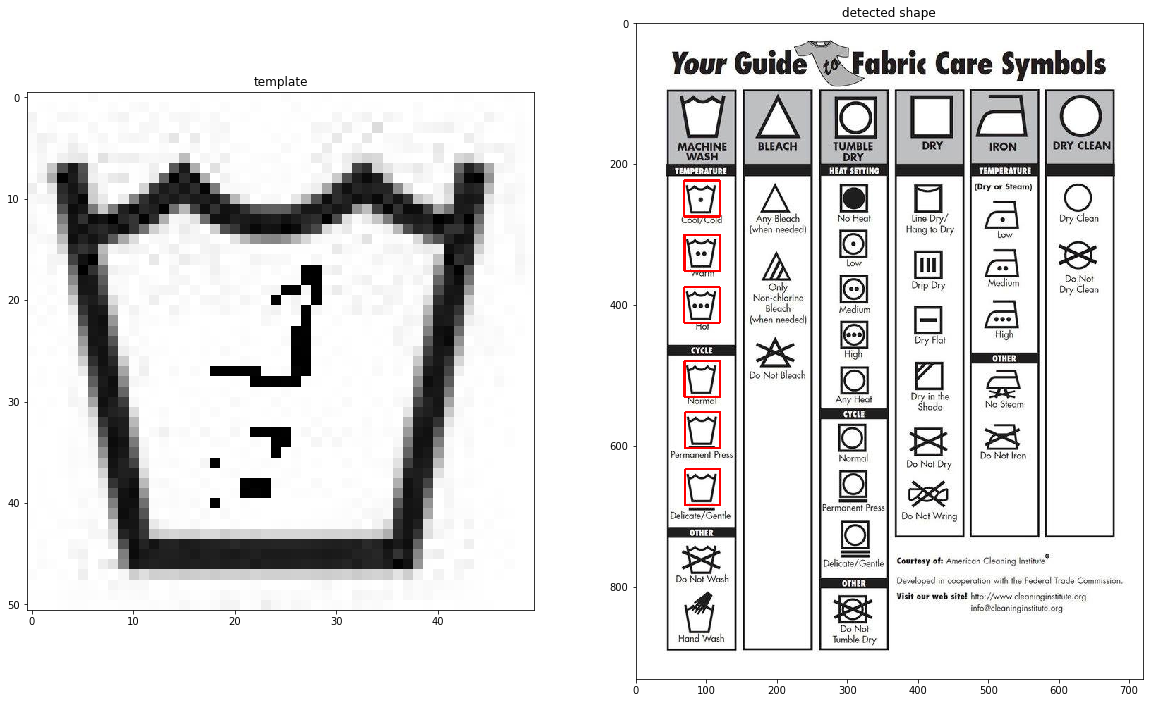

In [4]:
img_rgb = cv2.imread('data.jpg',1)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template1 = cv2.imread('l4.jpg',1)
template = cv2.imread('l4.jpg',0)
w, h = template.shape[::-1]
flag=0


res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    flag=1
    #print('yes')

if flag == 1:
    print('Shape is detected')
else:
    print('not detected')


plot_side_by_side(template1,img_rgb,"template","detected shape",1)